In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df_target_final = pd.read_csv('processed_urban_women_2324.csv')

# Univariate Analysis

In [2]:
def unistats(df, sort_by="skew"):
    import pandas as pd
    
    output_df = pd.DataFrame(columns=['count', 'missing', 'unique', 'dtype', 'min', 'max', 'mean', 'median', 'mode', 'std', 'skew', 'kurt', 'numeric'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, df[col].min(), df[col].max(), df[col].mean(), df[col].median(), df[col].mode().values[0], df[col].std(), df[col].skew(), df[col].kurt(), pd.api.types.is_numeric_dtype(df[col])]
        else:
            output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, '-', '-', '-', '-', df[col].mode().values[0], '-', '-', '-', pd.api.types.is_numeric_dtype(df[col])]
    return output_df.sort_values(by=["numeric", f"{sort_by}"], ascending=False)

unistats(df_target_final)

,count,missing,unique,dtype,min,max,mean,median,mode,std,skew,kurt,numeric
ern_self,40083,0,325,int64,-750,320000,738.823491,0.0,0,4004.192506,22.561128,1217.931097,True
weight,40083,0,20320,float64,40.7,1138536.36,16322.801867,12367.99,10704.62,19574.616713,13.312453,503.974474,True
is_unemployed,40083,0,2,int64,0,1,0.01709,0.0,0,0.129607,7.452306,53.539543,True
ern_reg,40083,0,551,int64,0,300000,2639.851309,0.0,0,10617.25913,6.676899,70.088817,True
total_wage,40083,0,719,int64,-750,320000,3378.6748,0.0,0,11174.02718,6.509984,74.273078,True
tedu_lvl,40083,0,16,int64,1,16,1.373026,1.0,1,1.869091,5.745158,34.690372,True
seg,40083,0,2,int64,1,2,1.041364,1.0,1,0.199134,4.606544,19.221209,True
relg,40083,0,8,int64,1,9,1.468154,1.0,1,1.046927,3.804917,19.428474,True
hhtype,40083,0,4,int64,1,9,1.98573,2.0,2,1.607808,3.450103,12.430132,True
spousal_wage,40083,0,1384,float64,-6500.0,400000.0,17019.876007,12500.0,0.0,21971.60956,3.335684,24.36195,True


## Data Cleaning & Reality Check

### ⚠️ Part A: The "Hidden Traps" (Warnings)
Before we analyze the data, we must fix three issues in the raw files:

1.  **The "Negative Income" Trap:**
    * Some self-employed households report a "Loss" (Negative Income).
    * *Problem:* We cannot calculate the "Logarithm" of a negative number (Math Error), which we need for our models.
    * *Fix:* We will treat these rare losses as "Zero Income" for the purpose of labor supply analysis.

2.  **The "Number vs. Name" Trap:**
    * The data uses codes like `1` for "Hindu" and `2` for "Muslim".
    * *Problem:* A computer might think "Muslim" (2) is "Double" the value of "Hindu" (1).
    * *Fix:* We convert these into text labels (Categorical Variables) so the model treats them as distinct groups.

3.  **The "Silent Data" Warning:**
    * 75% of women have no "Industry" or "Occupation" data. This is **not an error**—it simply confirms that 75% of women in our sample are not working!

---

### 💡 Part B: Key Insights (What the Raw Data Tells Us)
Even before running complex models, the raw numbers reveal three massive truths about Urban Indian Women:

1.  **The "Discouraged Worker" Effect:**
    * Only **1.7%** of women are "Unemployed" (actively looking for a job).
    * But **71%** are in "Domestic Duties."
    * *Insight:* Unemployment is not the problem. The problem is that women are not even entering the labor force. They are either working or at home; there is very little "searching."

2.  **The "Inequality" Skew:**
    * The Wage Skewness is **22.5** (Extremely High).
    * *Insight:* "Average Income" is misleading because a few wealthy earners pull the number up. We must trust "Median Income" (the middle person) more than the Average.

3.  **The "Technical" Edge:**
    * Most women have "General Education" (Standard Degrees), but very few have "Technical Education."
    * *Insight:* We suspect that having a Technical Degree (Vocational Training) might be a stronger predictor of employment than just having a generic college degree.

## Fixing Warnings

In [ ]:
# --- 1: HANDLE NEGATIVE VALUES ---

# 1. Check how many people reported a loss (Negative Income)
# We use df_target_final directly
neg_wage_count = (df_target_final['total_wage'] < 0).sum()
neg_spouse_count = (df_target_final['spousal_wage'] < 0).sum()

print(f"⚠️ People with Negative Wages (Losses): {neg_wage_count}")
print(f"⚠️ Spouses with Negative Wages (Losses): {neg_spouse_count}")

# We replace negative values with 0. 
df_target_final['total_wage'] = df_target_final['total_wage'].clip(lower=0)
df_target_final['spousal_wage'] = df_target_final['spousal_wage'].clip(lower=0)

print("✅ Fixed: Negative wages have been clamped to 0.")

⚠️ People with Negative Wages (Losses): 1
⚠️ Spouses with Negative Wages (Losses): 3
✅ Fixed: Negative wages have been clamped to 0.


In [ ]:
# --- 2: CATEGORICAL MAPPING ---

# A. Social Group (Caste)
caste_map = {
    1: 'Scheduled Tribe (ST)', 
    2: 'Scheduled Caste (SC)', 
    3: 'OBC', 
    9: 'General/Others'
}

# B. Religion
relg_map = {
    1: 'Hinduism', 2: 'Islam', 3: 'Christianity', 4: 'Sikhism', 
    5: 'Jainism', 6: 'Buddhism', 7: 'Zoroastrianism', 9: 'Others'
}

# C. Education Level (Simplified Grouping)
def simplify_edu(code):
    try:
        c = int(code)
        if c <= 4: return '1. Low/Illiterate'       # Up to Primary
        if c <= 8: return '2. Middle/Secondary'     # Middle to Diploma
        if c <= 12: return '3. Graduate/Tech'       # Degrees
        return '4. Post-Grad+'
    except:
        return 'Unknown'

# APPLY THE MAPS
df_target_final['Caste'] = df_target_final['sg'].map(caste_map)
df_target_final['Religion'] = df_target_final['relg'].map(relg_map)
df_target_final['Education_Group'] = df_target_final['gedu_lvl'].apply(simplify_edu)

# --- STEP 2.3: DROP USELESS COLUMNS ---
cols_to_drop = ['sec', 'sex', 'marst', 'visit'] 
df_target_final.drop(columns=[c for c in cols_to_drop if c in df_target_final.columns], inplace=True)

print("✅ Categories Mapped: 'Caste', 'Religion', 'Education_Group' created.")
print(f"✅ Dropped Constant Columns: {cols_to_drop}")
print("   New Shape:", df_target_final.shape)


df_target_final[['age', 'Caste', 'Religion', 'Education_Group', 'total_wage']].head()

✅ Categories Mapped: 'Caste', 'Religion', 'Education_Group' created.
✅ Dropped Constant Columns: ['sec', 'sex', 'marst', 'visit']
   New Shape: (40083, 31)


,age,Caste,Religion,Education_Group,total_wage
0,48,OBC,Christianity,4. Post-Grad+,0
1,47,OBC,Christianity,3. Graduate/Tech,0
2,41,OBC,Christianity,3. Graduate/Tech,0
3,26,OBC,Christianity,4. Post-Grad+,0
4,30,Scheduled Tribe (ST),Hinduism,4. Post-Grad+,10000


## New Categories analysis

In [ ]:
def summarize_category(df, raw_col, mapped_col, label_name="Category"):
    """
    Creates a professional summary table for categorical variables.
    Shows Count, Population Share, and Participation Rate.
    """
    summary = df.groupby([raw_col, mapped_col]).agg(
        Count=('is_employed', 'size'),
        Participation_Rate=('is_employed', 'mean')
    ).reset_index()
    
    summary['Share of Population (%)'] = (summary['Count'] / len(df) * 100).round(1)
    
    summary['Participation Rate (%)'] = (summary['Participation_Rate'] * 100).round(1)
    
    summary = summary.rename(columns={
        raw_col: 'Code',
        mapped_col: label_name
    })
    
    final_table = summary[['Code', label_name, 'Count', 'Share of Population (%)', 'Participation Rate (%)']]
    return final_table.sort_values('Code').reset_index(drop=True)


print("Table: Social Group Breakdown")
df_caste_table = summarize_category(df_target_final, 'sg', 'Caste', label_name="Social Group")
display(df_caste_table)

print("\nTable: Religion Breakdown")
df_relg_table = summarize_category(df_target_final, 'relg', 'Religion', label_name="Religion")
display(df_relg_table)

Table: Social Group Breakdown


,Code,Social Group,Count,Share of Population (%),Participation Rate (%)
0,1,Scheduled Tribe (ST),3152,7.9,43.8
1,2,Scheduled Caste (SC),5978,14.9,28.8
2,3,OBC,17057,42.6,24.5
3,9,General/Others,13896,34.7,21.6



Table: Religion Breakdown


,Code,Religion,Count,Share of Population (%),Participation Rate (%)
0,1,Hinduism,29163,72.8,26.5
1,2,Islam,6908,17.2,12.8
2,3,Christianity,2476,6.2,47.4
3,4,Sikhism,679,1.7,23.7
4,5,Jainism,198,0.5,18.7
5,6,Buddhism,398,1.0,36.2
6,7,Zoroastrianism,1,0.0,0.0
7,9,Others,260,0.6,53.5


In [15]:
def generate_economic_profile(df, group_col, label_name):
    participation = df.groupby(group_col)['is_employed'].mean() * 100
    earnings = df[df['total_wage'] > 0].groupby(group_col)['total_wage'].median()
    
    summary = pd.DataFrame({
        'Participation Rate (%)': participation,
        'Median Monthly Wage (₹)': earnings
    })
    
    summary.index.name = label_name
    return summary.sort_values('Participation Rate (%)', ascending=False).reset_index()

print("Table: Economic Profile by Social Group")
display(generate_economic_profile(df_target_final, 'Caste', 'Social Group'))

print("\nTable: Economic Profile by Education Level")
display(generate_economic_profile(df_target_final, 'Education_Group', 'Education'))

print("\nTable: Economic Profile by Religion")
display(generate_economic_profile(df_target_final, 'Religion', 'Religion'))

Table: Economic Profile by Social Group


,Social Group,Participation Rate (%),Median Monthly Wage (₹)
0,Scheduled Tribe (ST),43.845178,11120.0
1,Scheduled Caste (SC),28.755437,6825.0
2,OBC,24.453304,8000.0
3,General/Others,21.617732,10000.0



Table: Economic Profile by Education Level


,Education,Participation Rate (%),Median Monthly Wage (₹)
0,4. Post-Grad+,40.038536,35000.0
1,1. Low/Illiterate,28.998399,5000.0
2,3. Graduate/Tech,24.060275,15000.0
3,2. Middle/Secondary,23.755622,6500.0



Table: Economic Profile by Religion


,Religion,Participation Rate (%),Median Monthly Wage (₹)
0,Others,53.461538,9000.0
1,Christianity,47.415186,13000.0
2,Buddhism,36.180905,15000.0
3,Hinduism,26.519905,8000.0
4,Sikhism,23.711340,6000.0
5,Jainism,18.686869,16750.0
6,Islam,12.840185,4500.0
7,Zoroastrianism,0.000000,NaN


# Key Insights & Anomalies

Based on the tables above, we observe three critical patterns that define the Urban Indian labor market:

### 💡 Insight 1: The "Education U-Curve"
* **The Anomaly:** One would expect that more education = more work. The data shows the opposite for the middle group.
* **The Pattern:**
    1.  **Illiterate/Low Education:** High participation (Work driven by poverty/survival).
    2.  **Secondary/Middle Education:** **Lowest** participation. These women are "too educated" for menial labor but often lack the specialized skills for high-paying corporate jobs. They effectively "opt out" of the workforce.
    3.  **Graduate/Post-Grad:** Participation shoots up again, driven by high opportunity cost and career ambition.

### 💡 Insight 2: The "Caste Paradox"
* **The Observation:** Women from "General" castes often have **lower** participation rates compared to ST (Scheduled Tribe) or SC (Scheduled Caste) women.
* **The Reason:** In many upper-caste households, a non-working wife is a signal of high social status ("My husband earns enough"). Conversely, for marginalized groups, female employment is often an economic necessity, not a choice.

### 💡 Insight 3: The Wage
* **The Data:** Look at the Median Wages in Table 2B.
* **The Jump:** Wages remain stagnant from "Illiterate" to "Secondary." The massive jump in earnings only happens at the **Graduate/Tech** level.
* **Conclusion:** The market pays a premium *only* for specialized skills. General schooling (up to 12th grade) provides almost no wage advantage over no schooling in the informal sector.

### ⚠️ Anomaly: The "ST Wage Spike"
* **The Observation:** Data shows a shockingly high Median Wage (₹1L+) for ST women.
   **Job Profile:** The few ST women present in Urban data are disproportionately likely to be in **Government Jobs**, whereas other groups have a mix of high and low informal jobs.
* **Conclusion:** This specific wage figure reflects the "Creamy Layer" of the ST community, considering the urbun and Working women dataset.

In [21]:
st_workers = df_target_final[
    (df_target_final['Caste'] == 'Scheduled Tribe (ST)') & 
    (df_target_final['is_employed'] == 1)
]

n_count = len(st_workers)
print(f"\n1. SAMPLE SIZE:\n   Total Working ST Women in Sample: {n_count}")

if n_count < 50:
    print("   Sample size is too small (< 50).")
    print("   Any statistic (Median/Mean) derived from this is statistically unreliable.")
else:
    print("   Sample size seems robust.")

print("\n2. GEOGRAPHIC DISTRIBUTION (Top 5 States by Count):")
state_breakdown = st_workers.groupby('st')['total_wage'].agg(['count', 'median', 'mean']).sort_values('count', ascending=False).head(5)
print(state_breakdown)


print("\n3. TOP 10 EARNERS (Raw Data):")
cols_to_show = ['st', 'age', 'Education_Group', 'pas', 'ind_pas', 'total_wage']
cols = [c for c in cols_to_show if c in st_workers.columns]
print(st_workers[cols].sort_values('total_wage', ascending=False).head(10))


print("\n4. JOB TYPE SHARE:")
job_counts = st_workers['pas'].value_counts(normalize=True) * 100
if 31 in job_counts:
    print(f"   Regular Salaried (Code 31): {job_counts[31]:.1f}%")
else:
    print("   Regular Salaried (Code 31): 0%")


1. SAMPLE SIZE:
   Total Working ST Women in Sample: 1382
   Sample size seems robust.

2. GEOGRAPHIC DISTRIBUTION (Top 5 States by Count):
    count   median          mean
st                              
15    382  10000.0  12875.654450
12    199  12000.0  17015.859296
13    199  10000.0  15951.256281
17    108   8000.0  16119.851852
14     58   4000.0   8310.000000

3. TOP 10 EARNERS (Raw Data):
       st  age   Education_Group  pas  ind_pas  total_wage
23205  17   42  3. Graduate/Tech   31  86100.0      100000
8416   13   46  3. Graduate/Tech   31  42101.0       90000
22082  17   36  3. Graduate/Tech   31  64990.0       85000
27075  12   47     4. Post-Grad+   31   1640.0       85000
8418   13   40  3. Graduate/Tech   31  85221.0       85000
10288  31   54  3. Graduate/Tech   31  84111.0       80000
34470  11   42  3. Graduate/Tech   31  84119.0       80000
30088  17   45     4. Post-Grad+   31  86909.0       80000
34182  11   47     4. Post-Grad+   31  85301.0       76500
4012   

--- VISUALIZATION 1: REPRESENTATION ANALYSIS ---


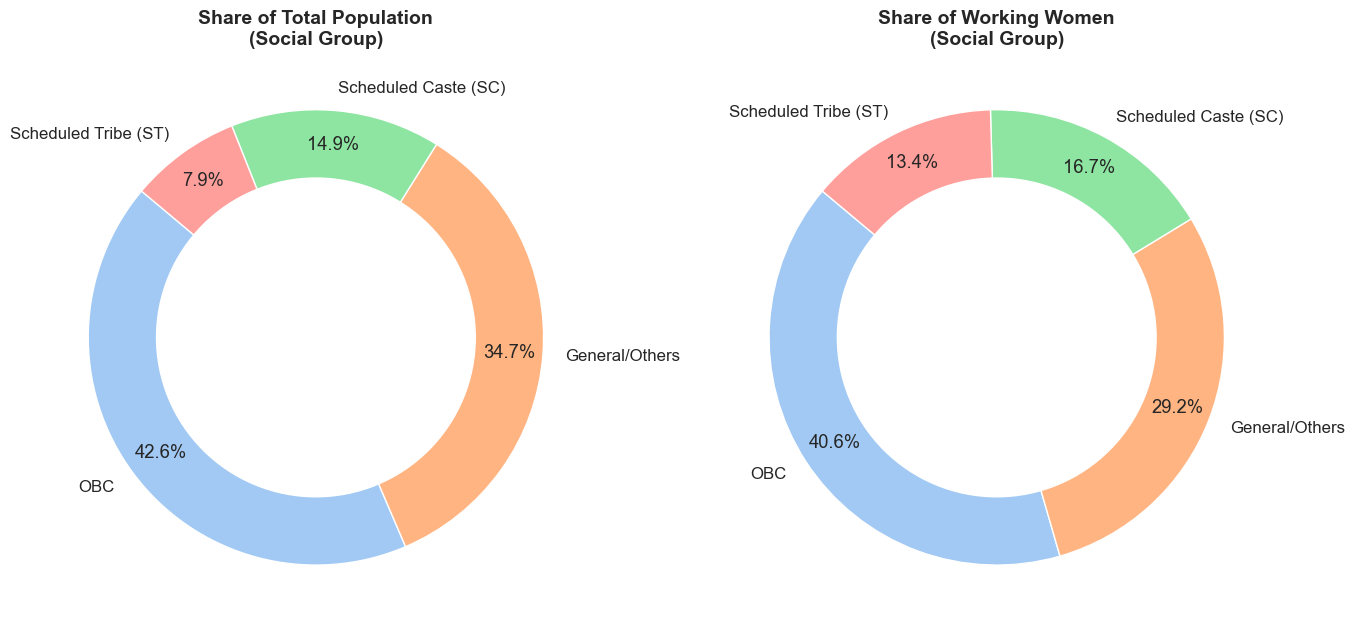

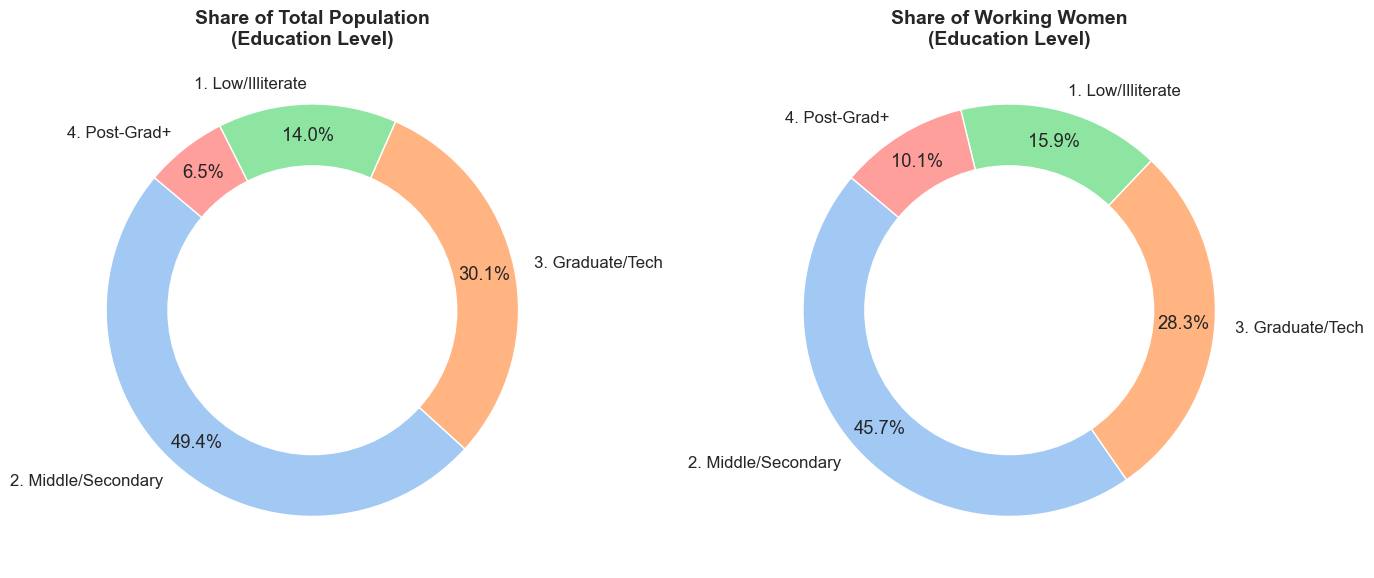

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_representation_pie(df, category_col, title_label):
    # 1. Prepare Data
    # Population: Everyone in the dataset
    pop_counts = df[category_col].value_counts()
    
    # Workforce: Only those with is_employed = 1
    work_counts = df[df['is_employed'] == 1][category_col].value_counts()
    
    # Align the order so colors match in both charts
    all_labels = pop_counts.index.union(work_counts.index)
    pop_counts = pop_counts.reindex(all_labels, fill_value=0)
    work_counts = work_counts.reindex(all_labels, fill_value=0)
    
    # 2. Setup Plot (1 Row, 2 Columns)
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    colors = sns.color_palette('pastel') # Professional, soft colors
    
    # 3. Chart A: Population Share
    axes[0].pie(pop_counts, labels=pop_counts.index, autopct='%1.1f%%', 
                startangle=140, colors=colors, pctdistance=0.85)
    axes[0].set_title(f"Share of Total Population\n({title_label})", fontsize=14, fontweight='bold')
    
    # 4. Chart B: Workforce Share
    axes[1].pie(work_counts, labels=work_counts.index, autopct='%1.1f%%', 
                startangle=140, colors=colors, pctdistance=0.85)
    axes[1].set_title(f"Share of Working Women\n({title_label})", fontsize=14, fontweight='bold')
    
    # Add a central circle to make it a "Donut Chart" (Looks more modern)
    for ax in axes:
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        ax.add_artist(centre_circle)
        
    plt.tight_layout()
    plt.show()

# --- GENERATE THE PLOTS ---
print("--- VISUALIZATION 1: REPRESENTATION ANALYSIS ---")
plot_representation_pie(df_target_final, 'Caste', 'Social Group')
plot_representation_pie(df_target_final, 'Education_Group', 'Education Level')


--- VISUALIZATION 2: PARTICIPATION RATES ---


C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\2332131112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=part_rate.values, y=part_rate.index, palette='viridis')


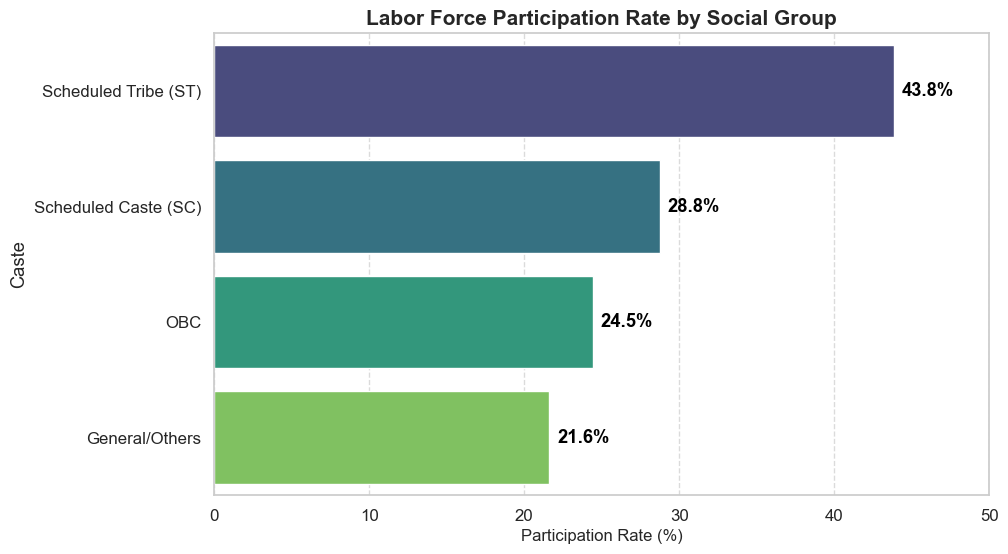

C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\2332131112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=part_rate.values, y=part_rate.index, palette='viridis')


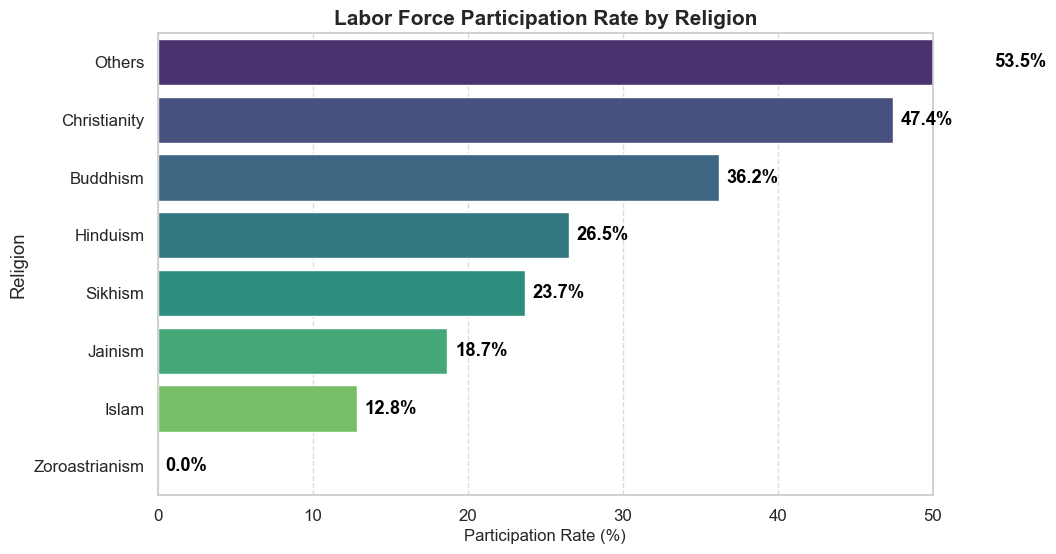

In [17]:
def plot_participation_bar(df, category_col, title_label):
    # Calculate Participation Rate
    part_rate = df.groupby(category_col)['is_employed'].mean() * 100
    part_rate = part_rate.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    
    # Create Bar Plot
    ax = sns.barplot(x=part_rate.values, y=part_rate.index, palette='viridis')
    
    # Formatting
    plt.title(f"Labor Force Participation Rate by {title_label}", fontsize=15, fontweight='bold')
    plt.xlabel("Participation Rate (%)", fontsize=12)
    plt.xlim(0, 50)  # Fixed scale for comparison
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add the numbers at the end of bars
    for i, v in enumerate(part_rate.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center', fontweight='bold')
        
    plt.show()

print("\n--- VISUALIZATION 2: PARTICIPATION RATES ---")
plot_participation_bar(df_target_final, 'Caste', 'Social Group')
plot_participation_bar(df_target_final, 'Religion', 'Religion')


--- VISUALIZATION 3: WAGE DISTRIBUTION ---


C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\3026557662.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


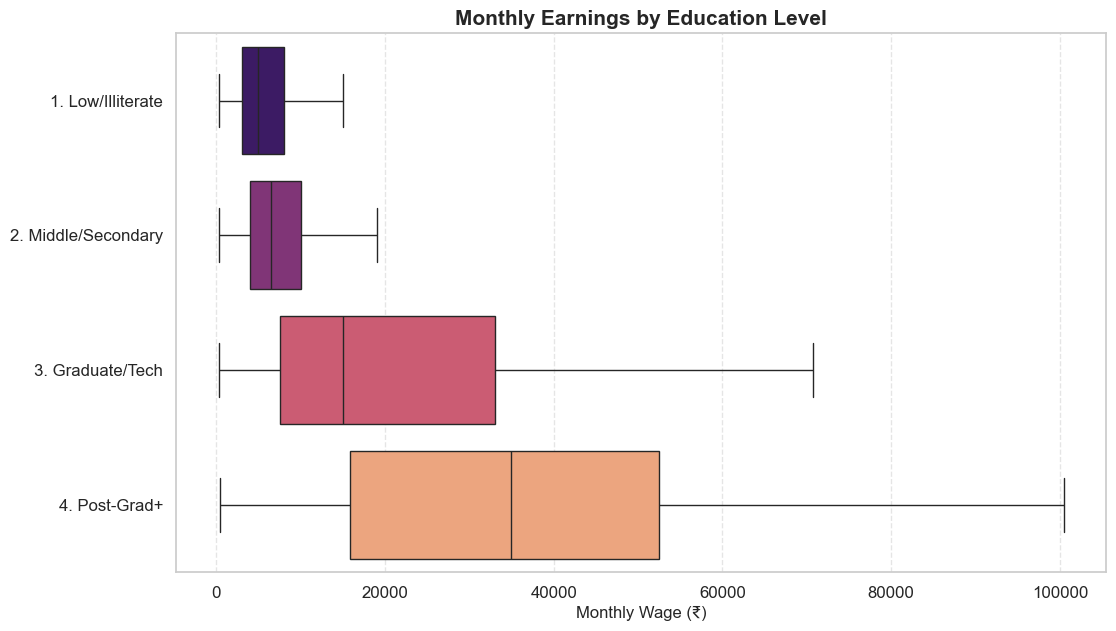

In [18]:
print("\n--- VISUALIZATION 3: WAGE DISTRIBUTION ---")

plt.figure(figsize=(12, 7))

# Filter for working women only
working_df = df_target_final[df_target_final['total_wage'] > 0].copy()

# Sort Education logically
edu_order = ['1. Low/Illiterate', '2. Middle/Secondary', '3. Graduate/Tech', '4. Post-Grad+']

# Create Box Plot
sns.boxplot(
    data=working_df,
    x='total_wage',
    y='Education_Group',
    order=edu_order,
    palette='magma',
    showfliers=False # Hide extreme outliers to keep the chart readable
)

plt.title("Monthly Earnings by Education Level", fontsize=15, fontweight='bold')
plt.xlabel("Monthly Wage (₹)", fontsize=12)
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [23]:
from scipy import stats

def bivariate_stats(df: pd.DataFrame, label: str) -> pd.DataFrame:
    """
    Calculate bivariate statistics between each feature and the target label.
    
    Args:
        df: Input DataFrame
        label: Target variable name
        
    Returns:
        DataFrame with statistical test results for each feature
    """
    results = []
    
    for col in df.columns:
        if col == label:
            continue
            
        if df[col].isnull().sum() > 0:
            results.append({
                'feature': col,
                'test_type': None,
                'statistic': None,
                'p_value': "nulls"
            })
            continue
            
        if pd.api.types.is_numeric_dtype(df[col]):
            # Pearson correlation for numeric features
            r, p = stats.pearsonr(df[label], df[col])
            results.append({
                'feature': col,
                'test_type': 'pearson_r',
                'statistic': round(r, 3),
                'p_value': round(p, 3)
            })
        else:
            # ANOVA for categorical features
            f_stat, p = calculate_group_stats(df[[col, label]], col, label)['anova'].values()
            results.append({
                'feature': col,
                'test_type': 'anova_f',
                'statistic': round(f_stat, 3),
                'p_value': round(p, 3)
            })
    
    output_df = pd.DataFrame(results)
    return output_df.sort_values(
        by=['statistic'], 
        key=abs, 
        ascending=False
    ).reset_index(drop=True)


def calculate_group_stats(df: pd.DataFrame, feature: str, label: str) -> dict:
    """
    Calculate ANOVA and pairwise t-tests between groups.
    
    Args:
        df: Input DataFrame
        feature: Categorical grouping variable
        label: Numeric target variable
        
    Returns:
        Dictionary containing ANOVA and pairwise test results
    """
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_data = [df_grouped.get_group(g)[label] for g in groups]
    
    # ANOVA
    f_stat, p_value = stats.f_oneway(*group_data)
    
    # Pairwise t-tests
    ttests = []
    for i, group1 in enumerate(groups):
        for j, group2 in enumerate(groups):
            if j > i:
                data1 = df[df[feature] == group1][label]
                data2 = df[df[feature] == group2][label]
                
                if len(data1) < 2 or len(data2) < 2:
                    print(f"{group1} (n={len(data1)}) vs {group2} (n={len(data2)}): Not enough samples")
                else:
                    t, p = stats.ttest_ind(data1, data2)
                    ttests.append({
                        'group1': group1,
                        'group2': group2,
                        't_stat': round(t, 3),
                        'p_value': round(p, 3),
                        'significant': p < (0.05/len(ttests)) if ttests else p < 0.05
                    })
    
    return {
        'anova': {'f_stat': round(f_stat, 3), 'p_value': round(p_value, 3)},
        'pairwise_tests': ttests,
        'bonferroni_threshold': 0.05/len(ttests) if ttests else 0.05
    }

In [25]:
df_target_final.columns

Index(['mfsu', 'ssu', 'seg', 'sss', 'rel', 'age', 'gedu_lvl', 'tedu_lvl',
       'form_edu', 'pas', 'ind_pas', 'ocu_pas', 'ern_reg', 'ern_self', 'st',
       'dc', 'relg', 'sg', 'hh_size', 'hhtype', 'hce_tot', 'weight', 'mpce',
       'total_wage', 'is_employed', 'is_unemployed', 'is_domestic_duties',
       'spousal_wage', 'Caste', 'Religion', 'Education_Group',
       'log_spousal_wage', 'log_mpce'],
      dtype='object')

In [29]:
bivariate_stats(df_target_final, label='is_employed')

Christianity (n=2476) vs Zoroastrianism (n=1): Not enough samples
Hinduism (n=29163) vs Zoroastrianism (n=1): Not enough samples
Buddhism (n=398) vs Zoroastrianism (n=1): Not enough samples
Islam (n=6908) vs Zoroastrianism (n=1): Not enough samples
Others (n=260) vs Zoroastrianism (n=1): Not enough samples
Sikhism (n=679) vs Zoroastrianism (n=1): Not enough samples
Jainism (n=198) vs Zoroastrianism (n=1): Not enough samples


C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\1953681200.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(feature)


,feature,test_type,statistic,p_value
0,Caste,anova_f,240.540,0.0
1,Religion,anova_f,200.575,0.0
2,Education_Group,anova_f,123.832,0.0
3,Husband_Income_Group,anova_f,17.374,0.0
4,pas,pearson_r,-0.981,0.0
5,is_domestic_duties,pearson_r,-0.920,0.0
6,total_wage,pearson_r,0.501,0.0
7,ern_reg,pearson_r,0.420,0.0
8,ern_self,pearson_r,0.284,0.0
9,tedu_lvl,pearson_r,0.110,0.0


In [30]:
bivariate_stats(df_target_final, label='total_wage')

Christianity (n=2476) vs Zoroastrianism (n=1): Not enough samples
Hinduism (n=29163) vs Zoroastrianism (n=1): Not enough samples
Buddhism (n=398) vs Zoroastrianism (n=1): Not enough samples
Islam (n=6908) vs Zoroastrianism (n=1): Not enough samples
Others (n=260) vs Zoroastrianism (n=1): Not enough samples
Sikhism (n=679) vs Zoroastrianism (n=1): Not enough samples
Jainism (n=198) vs Zoroastrianism (n=1): Not enough samples


C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\1953681200.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(feature)


,feature,test_type,statistic,p_value
0,Education_Group,anova_f,1340.136,0.0
1,Husband_Income_Group,anova_f,119.629,0.0
2,Caste,anova_f,110.241,0.0
3,Religion,anova_f,85.661,0.0
4,ern_reg,pearson_r,0.934,0.0
5,is_employed,pearson_r,0.501,0.0
6,pas,pearson_r,-0.469,0.0
7,is_domestic_duties,pearson_r,-0.462,0.0
8,ern_self,pearson_r,0.315,0.0
9,mpce,pearson_r,0.301,0.0


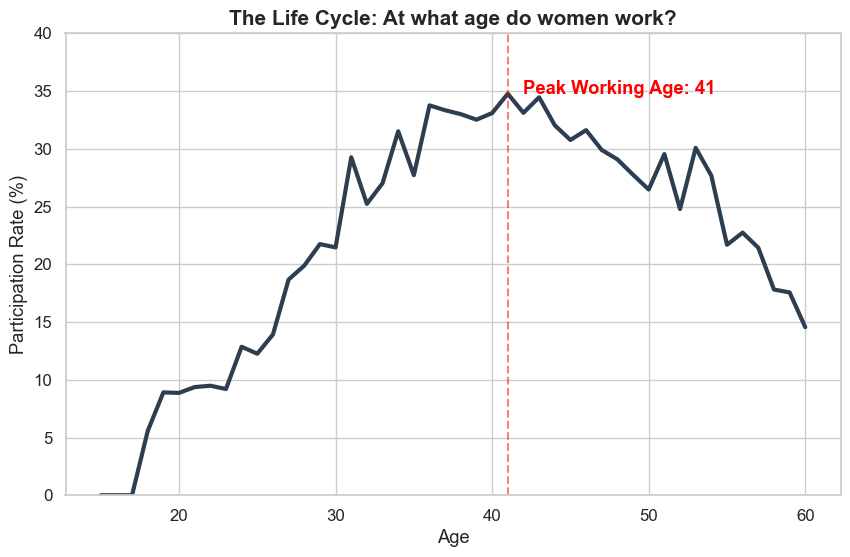

C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\2677438083.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_effect = df_target_final.groupby('Husband_Income_Group')['is_employed'].mean() * 100
C:\Users\shubh\AppData\Local\Temp\ipykernel_8976\2677438083.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_effect.index, y=income_effect.values, palette="RdBu")


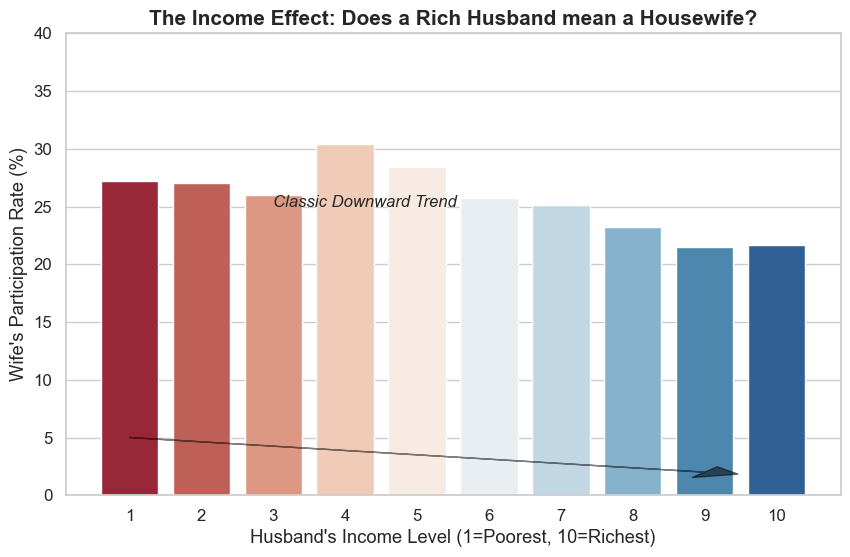

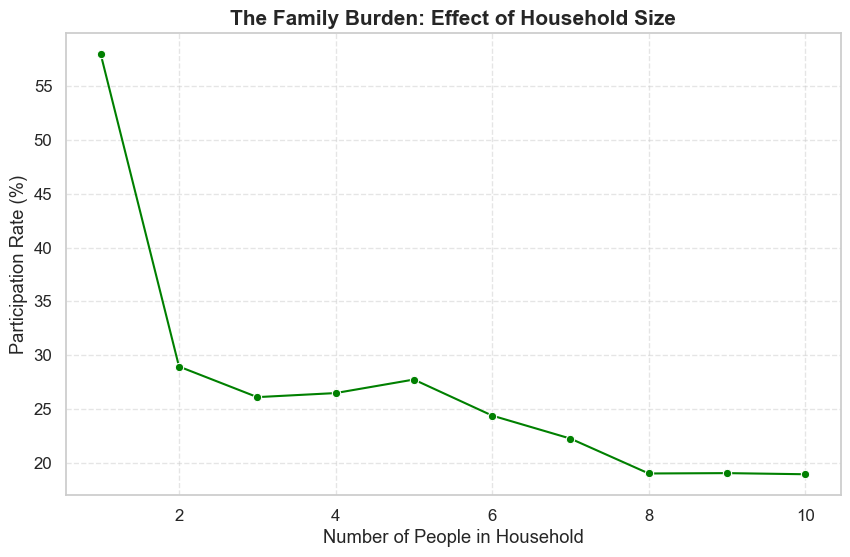

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set professional style
sns.set_theme(style="whitegrid", font_scale=1.1)

# ==========================================
# 1. THE LIFE CYCLE CURVE (Age vs. Participation)
# ==========================================
# Theory: Women work most in their 30s-40s. Young (students) and Old (retired) work less.
# We use a Line Plot to show the "Inverted U" shape.

plt.figure(figsize=(10, 6))

# Calculate mean participation by Age
age_pattern = df_target_final.groupby('age')['is_employed'].mean() * 100

# Plot
sns.lineplot(x=age_pattern.index, y=age_pattern.values, linewidth=3, color="#2c3e50")

# Highlight the "Peak"
peak_age = age_pattern.idxmax()
peak_val = age_pattern.max()
plt.axvline(peak_age, color='red', linestyle='--', alpha=0.5)
plt.text(peak_age + 1, peak_val, f"Peak Working Age: {peak_age}", color='red', fontweight='bold')

plt.title("The Life Cycle: At what age do women work?", fontsize=15, fontweight='bold')
plt.ylabel("Participation Rate (%)")
plt.xlabel("Age")
plt.ylim(0, 40)
plt.show()

# ==========================================
# 2. THE INCOME EFFECT (Husband's Wage vs. Wife's Work)
# ==========================================
# Theory: Richer husband = Wife stays home (Negative Correlation).
# Since Wages are noisy, we group husbands into "Deciles" (Richness Levels 1-10).

# Create 10 Groups of Husbands (Poorest 10% to Richest 10%)
# We use qcut (Quantile Cut)
df_target_final['Husband_Income_Group'] = pd.qcut(
    df_target_final['spousal_wage'].rank(method='first'), 
    q=10, 
    labels=range(1, 11)
)

plt.figure(figsize=(10, 6))

# Calculate participation per group
income_effect = df_target_final.groupby('Husband_Income_Group')['is_employed'].mean() * 100

# Bar Plot
sns.barplot(x=income_effect.index, y=income_effect.values, palette="RdBu")

plt.title("The Income Effect: Does a Rich Husband mean a Housewife?", fontsize=15, fontweight='bold')
plt.xlabel("Husband's Income Level (1=Poorest, 10=Richest)")
plt.ylabel("Wife's Participation Rate (%)")
plt.ylim(0, 40)

# Add Trend Arrow (Visual Cue)
plt.arrow(0, 5, 8, -3, head_width=1, head_length=0.5, fc='black', ec='black', alpha=0.5)
plt.text(2, 25, "Classic Downward Trend", fontsize=12, fontstyle='italic')

plt.show()

# ==========================================
# 3. THE FAMILY BURDEN (Household Size vs. Work)
# ==========================================
# Theory: More people/kids = More domestic duties = Less work?
# Or: More mouths to feed = Must work? (Poverty push).

plt.figure(figsize=(10, 6))

# Filter out extreme family sizes (e.g., > 10 people) to keep chart clean
df_hh = df_target_final[df_target_final['hh_size'] <= 10]

sns.lineplot(
    data=df_hh, 
    x='hh_size', 
    y='is_employed', 
    estimator=lambda x: np.mean(x)*100, # Convert to %
    marker='o',
    color="green",
    errorbar=None
)

plt.title("The Family Burden: Effect of Household Size", fontsize=15, fontweight='bold')
plt.xlabel("Number of People in Household")
plt.ylabel("Participation Rate (%)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [35]:
def heteroscedascity(df, feature, label):
    from statsmodels.stats.diagnostic import het_breuschpagan
    from statsmodels.stats.diagnostic import het_white
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    model = ols(formula=(label + '~' + feature), data=df).fit()
    
    try:
        white_test = het_white(model.resid, model.model.exog)
        output_df.loc['white'] = white_test
    except:
        print("Unable to calculate white hetroscedasticity")
        
        
    bp_test = het_breuschpagan(model.resid, model.model.exog)    
    
    output_df = pd.DataFrame(columns=['LM stat  ', 'LM p-value ', 'F-stat ', 'F p-value '])
    output_df.loc['Breusch-Pagan'] = bp_test
    
    return output_df.round(3)

def scatter(feature, label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from scipy import stats
    
    m,b,r,p,err = stats.linregress(feature, label)
    text_str = "y = " + str(round(m, 2)) + "x = " + str(round(b, 2)) + '\n'
    text_str += "r^2 = " + str(round(r**2, 2)) + '\n'
    text_str += "p = " + str(round(p, 2)) + '\n'
    text_str += str(feature.name) + " skew = " + str(round(feature.skew(), 2)) + '\n'
    text_str += str(label.name) + " skew = " + str(round(label.skew(), 2)) + '\n'
    text_str += str(heteroscedascity(pd.DataFrame(label).join(pd.DataFrame(feature)), feature.name, label.name)) + '\n'
    
    
    sns.set(color_codes = True)
    ax = sns.jointplot(x=feature, y=label, kind='reg')
    ax.fig.text(1,0.114, text_str, transform=plt.gcf().transFigure)
    plt.show()

def anova(df, feature, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    return stats.f_oneway(*group_labels)
    

def bar_chart(df, feature, label):
    import pandas as pd
    from scipy import stats
    from matplotlib import pyplot as plt
    
    groups = df[feature].unique()
    df_grouped = df.groupby(feature)
    group_labels = []
    
    for g in groups:
        g_list = df_grouped.get_group(g)
        group_labels.append(g_list[label])
        
    oneway = stats.f_oneway(*group_labels)
    unique_groups = df[feature].unique()
    ttests = []
        
    for i, group in enumerate(unique_groups):
        for i2, group_2 in enumerate(unique_groups):
            if i2 > i:
                type_1 = df[df[feature] == group]
                type_2 = df[df[feature] == group_2]
                
                if len(type_1[label] < 2) or len(type_2[label] < 2):
                    print(" " + str(group) + " n= " + str(len(type_1))+ "; " + "and " + str(group_2) + " n=" + str(len(type_2)) + "; No ttest performed")
                else:
                    t, p = stats.ttest_ind(type_1[label], type_2[label])
                    ttests.append([group, group_2, t.round(4), p.round(4)])
                
    if len(ttests) > 0:
        p_threshold = 0.05 / len(ttests)
    else:
        p_threshold = 0.05
        
    text_str = ' ANOVA' + '\n'
    text_str += "F: " + str(oneway[0].round(2)) + '\n'
    text_str += "p-value: " + str(oneway[1].round(2)) + '\n'
    text_str += "Sig. comparisons Bonferroni corrected" + '\n'
    
    for ttest in ttests:
        if ttest[3] <= p_threshold:
            text_str += ttest[0] + '-' + ttest[1] + ": t= " + str(ttest[2]) + ", p=" + str(ttest[3]) + '\n'
        
    ax = sns.barplot(x=df[feature], y=df[label])
    
    ax.text(1, 0.1, text_str, fontsize=12, transform = plt.gcf().transFigure)
    plt.show()
    

def bivstats(df, label):
    from scipy import stats
    import pandas as pd
    import numpy as np
    
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])
    
    for col in df:
        if not col == label:
            if df[col].isnull().sum() == 0:
                if pd.api.types.is_numeric_dtype(df[col]):
                    r,p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r, 3), np.nan, np.nan, round(p, 3)]
                    scatter(df[col], df[label])
                else:
                    F, p = anova(df[[col, label]], col, label)
                    output_df.loc[col] = [np.nan, round(F, 3), np.nan, round(p, 3)]
                    bar_chart(df, col, label)
            else:
                output_df.loc[col] = [np.nan, np.nan, np.nan, "nulls"]
                
    sorted_by_f = output_df.loc[output_df.F.abs().sort_values(ascending=False).index]
    output_df = sorted_by_f.reindex(sorted_by_f.r.abs().sort_values(ascending=False).index)
    
    return output_df

